In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter

In [15]:
names = ['x', 'y', 'class']

# loading training data
df = pd.read_csv('H:/SELF/Yashu/Files/knn/demo_data/3.concertriccir2.csv', header=None, names=names)
print(df.head())

# create design matrix X and target vector y
X = np.array(df.iloc[:, 0:2]) # end index is exclusive
y = np.array(df['class']) # showing you two ways of indexing a pandas df


          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


### Simple Cross Validation

In [18]:
X_1,X_test,y_1,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_tr,X_cv,y_tr,y_cv= train_test_split(X_1,y_1,test_size=0.3)

for i in range(1,30,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr,y_tr)
    pred=knn.predict (X_cv)
    
    acc=accuracy_score(y_cv,pred,normalize=True)*float(100)
    print('\nCV accuracy for k = %d is %d%%' %(i,acc))
    
knn=KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred=knn.predict(X_test)
acc=accuracy_score(y_test, pred, normalize=True)*float(100)
print('\n*****Test accuracy for k=1 is %d%%' %(acc))



CV accuracy for k = 1 is 90%

CV accuracy for k = 3 is 90%

CV accuracy for k = 5 is 92%

CV accuracy for k = 7 is 90%

CV accuracy for k = 9 is 87%

CV accuracy for k = 11 is 85%

CV accuracy for k = 13 is 85%

CV accuracy for k = 15 is 82%

CV accuracy for k = 17 is 80%

CV accuracy for k = 19 is 79%

CV accuracy for k = 21 is 80%

CV accuracy for k = 23 is 77%

CV accuracy for k = 25 is 76%

CV accuracy for k = 27 is 72%

CV accuracy for k = 29 is 70%

*****Test accuracy for k=1 is 86%


### 10 fold cross validation

In [22]:
myList=list(range(0,50))
neighbors=list(filter(lambda x:x %2!=0,myList))

cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_tr,y_tr,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE=[1-x for x in cv_scores]

optimal_k=neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 3.


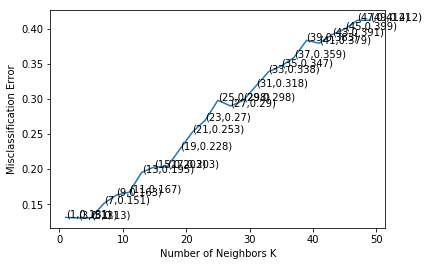

the misclassification error for each k value is :  [0.131 0.13  0.13  0.151 0.163 0.167 0.195 0.203 0.203 0.228 0.253 0.27
 0.298 0.29  0.298 0.318 0.338 0.347 0.359 0.383 0.379 0.391 0.399 0.412
 0.412]


In [25]:
plt.plot(neighbors,MSE)

for xy in zip(neighbors,np.round(MSE,3)):
    plt.annotate('(%s,%s)' %xy,xy=xy, textcoords='data')
    
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print('the misclassification error for each k value is : ',np.round(MSE,3))

In [26]:
knn_optimal=KNeighborsClassifier(n_neighbors=optimal_k)

knn_optimal.fit(X_tr,y_tr)

pred=knn_optimal.predict(X_test)

acc=accuracy_score(y_test, pred)*100
print('\nThe accuracy of the knn classifier for k= %d is %f%%' %(optimal_k,acc))


The accuracy of the knn classifier for k= 3 is 86.000000%
